### Home task: 
    - explore whether there are any dependences between reading/writing/math_scores;
    - find out whether student's race or/and paretns' level_of_education influences lunch_type of their children;
    - attach all proving plots.

#### Imports

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Data

In [102]:
student_perform = pd.DataFrame(pd.read_csv('C:/Users/Admin/Python2/StudentsPerformance.csv'))

In [35]:
student_perform.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

##### exploring the data

In [26]:
student_perform.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Will rename all the values with space to an underscore.

In [103]:
student_perform.columns = student_perform.columns.str.replace(' ', '_')
student_perform.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Functions

In [31]:
def score_depend(df, s1, s2):
    #pearson = format(scipy.stats.pearsonr(df.s1, df.s2)[0], '.3f')
    #I tried to add it in the function, but it doesn't work for somereason
    return df.plot.scatter(x = s1, y = s2)#.text(x = 20, y = 80, s = pearson)

def linear_depend(df, s1, s2):
    return sns.lmplot(data = df, x = s1, y = s2)

#def lunch_depend(df, s1, s2):

#### Results

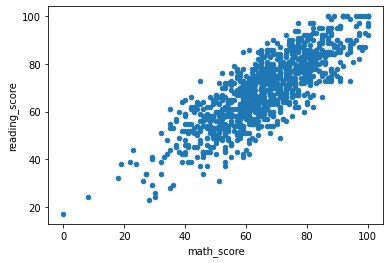

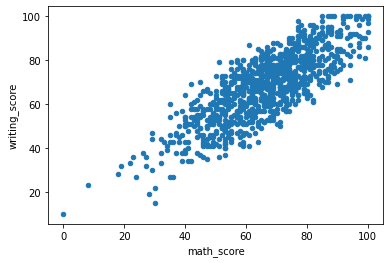

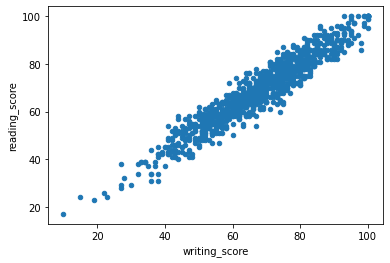

In [32]:
score_depend(student_perform, 'math_score', 'reading_score')
score_depend(student_perform, 'math_score', 'writing_score')
score_depend(student_perform, 'writing_score', 'reading_score')

######  
All three scatterplots suggest a linear correlation. To check the Pearson's correlation, let's chech first if data is normally distriuted (Shapiro test and QQ-plot)

In [55]:
scipy.stats.shapiro(student_perform.math_score)

(0.9931508302688599, 0.0001453401637263596)

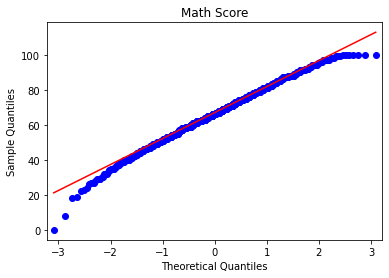

In [75]:
sm.qqplot(student_perform.math_score, line ='q')
plt.title("Math Score")
plt.show()

In [56]:
scipy.stats.shapiro(student_perform.reading_score)

(0.9929210543632507, 0.0001056220498867333)

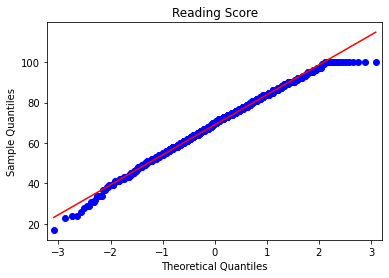

In [74]:
sm.qqplot(student_perform.reading_score, line ='q')
plt.title("Reading Score")
plt.show()

In [57]:
scipy.stats.shapiro(student_perform.writing_score)

(0.9919633269309998, 2.9172901122365147e-05)

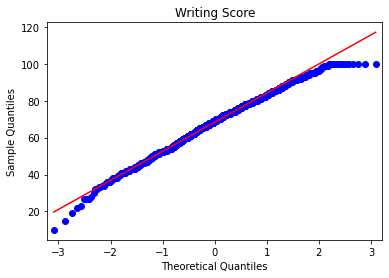

In [73]:
sm.qqplot(student_perform.writing_score, line ='q')
plt.title("Writing Score")
plt.show()

######  
Let's check Pearson's correlation.

In [34]:
format(scipy.stats.pearsonr(student_perform.math_score, student_perform.reading_score)[0], '.3f')

'0.818'

In [36]:
format(scipy.stats.pearsonr(student_perform.math_score, student_perform.writing_score)[0], '.3f')

'0.803'

In [37]:
format(scipy.stats.pearsonr(student_perform.writing_score, student_perform.reading_score)[0], '.3f')

'0.955'

######  
All three coefficients give strong evidence that each pair of scores have positive linear correlation. With the strongest correletion for writing and reading.

Let's build a linear model for each plot

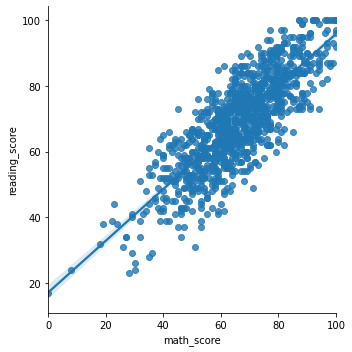

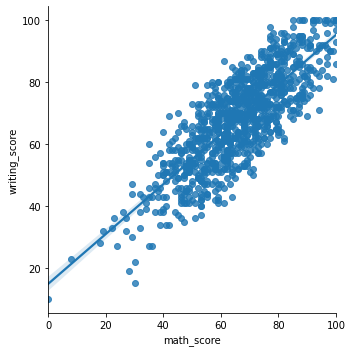

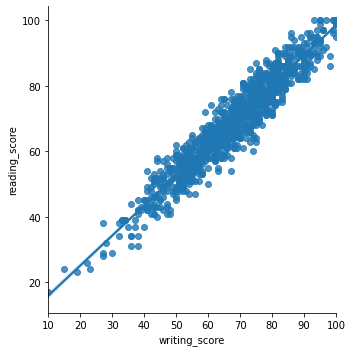

In [38]:
linear_depend(student_perform, 'math_score', 'reading_score')
linear_depend(student_perform, 'math_score', 'writing_score')
linear_depend(student_perform, 'writing_score', 'reading_score')

In [120]:
student_perform_race_lunch = student_perform.groupby(["lunch", "race/ethnicity"]).aggregate({"gender": "count"})
student_perform_race_lunch = student_perform_race_lunch.rename(columns = {"gender":'count'}).reset_index()
student_perform_parentsed_lunch = student_perform.groupby(["lunch", "parental_level_of_education"]).aggregate({"gender": "count"})
student_perform_parentsed_lunch = student_perform_parentsed_lunch.rename(columns = {"gender":'count'}).reset_index()

In [134]:
race = student_perform_race_lunch.pivot(columns = "lunch", values = "count", index = "race/ethnicity")
race

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


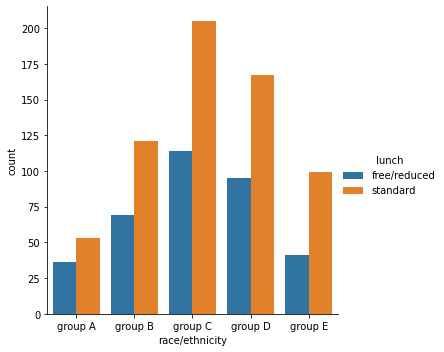

In [128]:
sns.catplot(data = student_perform_race_lunch, x = "race/ethnicity", y = "count", hue = "lunch", kind = "bar")

In [139]:
chi2, p_race, dof, exp = scipy.stats.chi2_contingency(race)
p_race

0.48669808284196503

In [135]:
parents = student_perform_parentsed_lunch.pivot(columns = "lunch", values = "count", index = "parental_level_of_education")
parents

lunch,free/reduced,standard
parental_level_of_education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


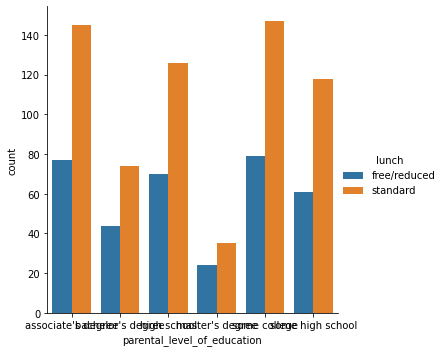

In [130]:
sns.catplot(data = student_perform_parentsed_lunch, x = "parental_level_of_education", y = "count", hue = "lunch", kind = "bar")

In [141]:
chi2, p_parents, dof, exp = scipy.stats.chi2_contingency(parents)
p_parents

0.9531014927218224

#####  
The p-value suggest that there's no dependency between race and lunch and parents' level of education and lunch.